## Final Project Submission

Please fill out:
* Student name: Daniel Quillao
* Student pace: Self-paced
* Scheduled project review date/time: TBD
* Instructor name: Jeff Herman
* Blog post URL:

# 1. Obtain Data

In [373]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [374]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# 2. Scrub and Clean Data

In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Check for erroneous values

In [376]:
# Preview the 5 most frequent entries from each column
for col in df.columns:
    try:
        print(col, df[col].value_counts()[:5])
    except:
        print(col, df[col].value_counts())
        # If there aren't 5+ unique values for a column the first print statement
        # will throw an error for an invalid idx slice
    print('\n') # Break up the output between columns

id 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64


date 6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64


price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64


sqft_lot 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: 

Notes:
- sqft_basement change to float, update '?' values

In [377]:
# sqft_basement: check for instances of '?'
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
274.0         1
915.0         1
2850.0        1
875.0         1
1816.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [378]:
# Drop rows as it only accounts for 2% of the data
df = df.drop(df[df['sqft_basement']=='?'].index)

In [379]:
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])

## Check for nulls

In [380]:
# Check sum of nulls
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2339
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3754
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Note: Check waterfront, view, and yr_renovated

In [381]:
# Get statistics
df[['waterfront', 'view', 'yr_renovated']].describe()

,waterfront,view,yr_renovated
count,18804.000000,21082.000000,17389.000000
mean,0.007552,0.233327,82.991949
std,0.086573,0.765066,398.481819
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,4.000000,2015.000000


In [382]:
null_list = ['waterfront', 'view', 'yr_renovated']

for feature in null_list:
    print(df[feature].value_counts())

0.0    18662
1.0      142
Name: waterfront, dtype: int64
0.0    19018
2.0      930
3.0      496
1.0      327
4.0      311
Name: view, dtype: int64
0.0       16666
2014.0       69
2003.0       31
2013.0       31
2007.0       30
          ...  
1953.0        1
1944.0        1
1934.0        1
1971.0        1
1959.0        1
Name: yr_renovated, Length: 69, dtype: int64


Notes:
- waterfront has 2339 null values
- view has 61 null values
- yr_renovated has 3754 null values
- The majority of the data is 0 for these features. Update null values to 0.

In [383]:
# Update null values to 0
df.fillna(0, inplace = True)

In [384]:
# Double-check for null values
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [385]:
# Check for duplicates
print(len(df[df.duplicated()]))

0


## Initial Feature Engineering

Notes:
- yr_renovated: convert to binary {0: not renovated, 1: renovated}
- sqft_basement: convert to binary {0: no basement, 1: has basement}
- view: convert to binary {0: not viewed, 1: has been viewed}
- date and id: not useful, drop
- lat and long: should be categorical, however might be better to drop (i think zip code will be a similar/better feauture)
- bathrooms and bedrooms: round

In [386]:
# yr_renovated
df['yr_renovated'].value_counts()

0.0       20420
2014.0       69
2003.0       31
2013.0       31
2007.0       30
          ...  
1953.0        1
1944.0        1
1934.0        1
1971.0        1
1959.0        1
Name: yr_renovated, Length: 69, dtype: int64

In [387]:
# Create new column renovated
df['renovated'] = df['yr_renovated'].map(lambda x: 1 if x > 0 else 0)
# Drop yr_renovated column
df = df.drop('yr_renovated', axis=1)

In [388]:
# Check new column
df['renovated'].value_counts()

0    20420
1      723
Name: renovated, dtype: int64

In [389]:
# sqft_basement
df['sqft_basement'].value_counts()

0.0       12826
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [390]:
# Create new column basement
df['basement'] = df['sqft_basement'].map(lambda x: 1 if x > 0 else 0)
# Drop sqft_basement column
df = df.drop('sqft_basement', axis=1)

In [391]:
# Check new column
df['basement'].value_counts()

0    12826
1     8317
Name: basement, dtype: int64

In [392]:
# view
df['view'].value_counts()

0.0    19079
2.0      930
3.0      496
1.0      327
4.0      311
Name: view, dtype: int64

In [393]:
# Update view
df['view'] = df['view'].map(lambda x: 1 if x > 0 else 0)

In [394]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     21143 non-null  float64
 9   view           21143 non-null  int64  
 10  condition      21143 non-null  int64  
 11  grade          21143 non-null  int64  
 12  sqft_above     21143 non-null  int64  
 13  yr_built       21143 non-null  int64  
 14  zipcode        21143 non-null  int64  
 15  lat            21143 non-null  float64
 16  long           21143 non-null  float64
 17  sqft_living15  21143 non-null  int64  
 18  sqft_l

In [395]:
# Drop: 
# id: not useful, drop
# lat and long: should be categorical, drop (i think zip code will be a similar/better feauture)
df.drop(columns=['date', 'id', 'lat', 'long'], inplace=True) 

In [396]:
# cols to round
cols = ['bedrooms', 'bathrooms']

df[cols] = df[cols].round(0)
df[cols]

,bedrooms,bathrooms
0,3,1.0
1,3,2.0
2,2,1.0
3,4,3.0
4,3,2.0
...,...,...
21592,3,2.0
21593,4,2.0
21594,2,1.0
21595,3,2.0


In [397]:
df['bathrooms'] = df.bathrooms.astype(int)

In [398]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21143 non-null  float64
 1   bedrooms       21143 non-null  int64  
 2   bathrooms      21143 non-null  int64  
 3   sqft_living    21143 non-null  int64  
 4   sqft_lot       21143 non-null  int64  
 5   floors         21143 non-null  float64
 6   waterfront     21143 non-null  float64
 7   view           21143 non-null  int64  
 8   condition      21143 non-null  int64  
 9   grade          21143 non-null  int64  
 10  sqft_above     21143 non-null  int64  
 11  yr_built       21143 non-null  int64  
 12  zipcode        21143 non-null  int64  
 13  sqft_living15  21143 non-null  int64  
 14  sqft_lot15     21143 non-null  int64  
 15  renovated      21143 non-null  int64  
 16  basement       21143 non-null  int64  
dtypes: float64(3), int64(14)
memory usage: 2.9 MB


## Check for outliers

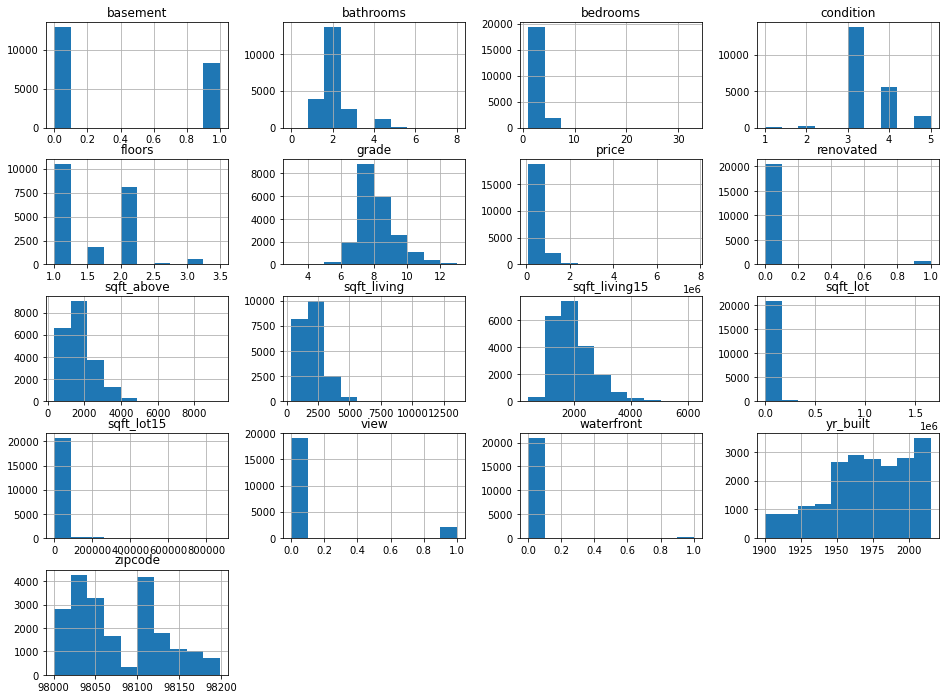

In [399]:
df.hist(figsize=(16, 12));

Notes: Look at bathrooms, bedrooms, price, sqft features

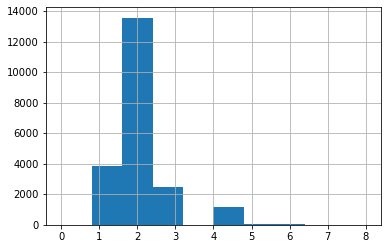

In [400]:
# bathrooms
df['bathrooms'].hist();

In [401]:
for i in range(90,100):
    q = i/100
    print("{} percentile: {}".format(q, df.bathrooms.quantile(q=q)))

0.9 percentile: 3.0
0.91 percentile: 3.0
0.92 percentile: 3.0
0.93 percentile: 3.0
0.94 percentile: 3.0
0.95 percentile: 4.0
0.96 percentile: 4.0
0.97 percentile: 4.0
0.98 percentile: 4.0
0.99 percentile: 4.0


In [402]:
df['bathrooms'].value_counts()

2    13568
1     3837
3     2470
4     1181
5       55
6       23
8        4
0        3
7        2
Name: bathrooms, dtype: int64

In [403]:
# Set limit to 4
df = df[df['bathrooms']<=4]

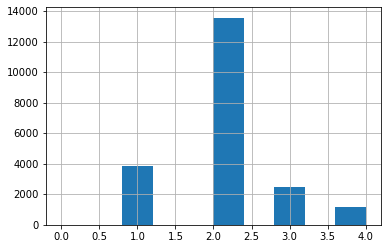

In [404]:
# bathrooms
df['bathrooms'].hist();

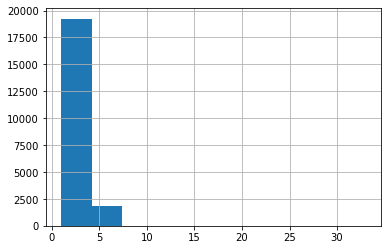

In [405]:
# bedrooms
df['bedrooms'].hist();

In [406]:
df['bedrooms'].value_counts()

3     9639
4     6716
2     2691
5     1525
6      247
1      191
7       30
8       11
9        5
10       2
11       1
33       1
Name: bedrooms, dtype: int64

In [407]:
for i in range(90,100):
    q = i/100
    print("{} percentile: {}".format(q, df.bedrooms.quantile(q=q)))

0.9 percentile: 4.0
0.91 percentile: 4.0
0.92 percentile: 5.0
0.93 percentile: 5.0
0.94 percentile: 5.0
0.95 percentile: 5.0
0.96 percentile: 5.0
0.97 percentile: 5.0
0.98 percentile: 5.0
0.99 percentile: 6.0


In [408]:
# Set limit to 12
df = df[df['bedrooms']<=5]

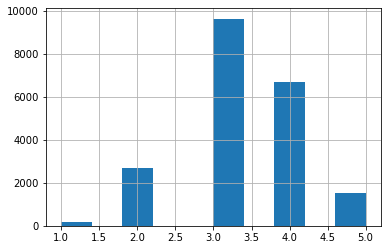

In [409]:
df['bedrooms'].hist()

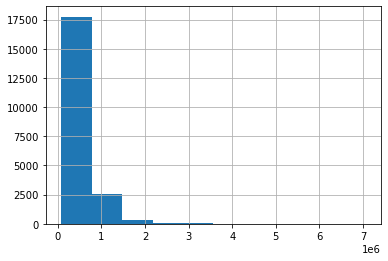

In [410]:
# price
df.price.hist();

In [411]:
df.price.value_counts()

350000.0    166
450000.0    163
550000.0    153
500000.0    149
425000.0    146
           ... 
575700.0      1
641200.0      1
739500.0      1
418900.0      1
884744.0      1
Name: price, Length: 3538, dtype: int64

In [412]:
for i in range(90,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

0.9 percentile: 872500.0
0.91 percentile: 900000.0
0.92 percentile: 935000.0
0.93 percentile: 975000.0
0.94 percentile: 1030000.0
0.95 percentile: 1110000.0
0.96 percentile: 1220000.0
0.97 percentile: 1340000.0
0.98 percentile: 1547799.9999999884
0.99 percentile: 1870000.0


In [413]:
# Set limit to 12
df = df[df['price']<=1300000]

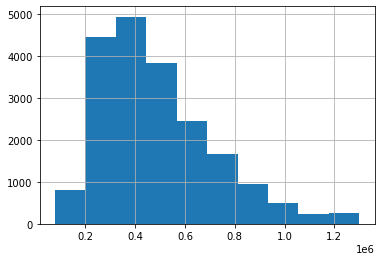

In [414]:
df.price.hist();

In [415]:
# Sqft features
sqft_feats = ['sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15']

# Removes feats with z-score above 3 for specific columns
# Reference https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame
for feat in sqft_feats:
    df = df[np.abs(df[feat]-df[feat].mean()) <= (3*df[feat].std())]

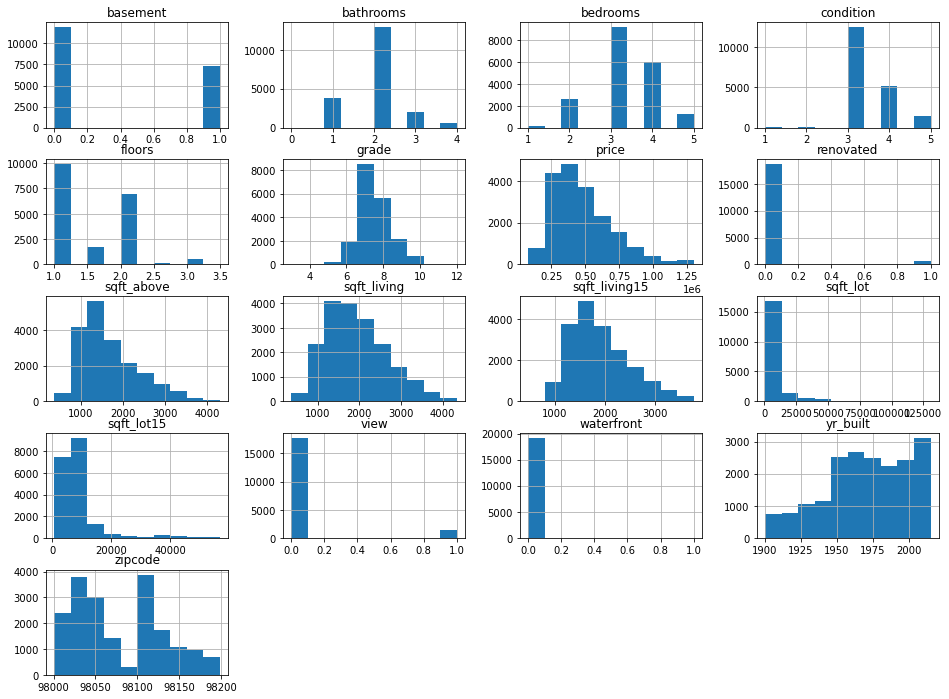

In [416]:
df.hist(figsize=(16,12));

## Normalize Continuous Features

In [417]:
# Log transform to reduce skewness
# Don't bother to normalize the price as this is the feature we will be predicting
# Remember that you can't take the logarithm of zero nor a negative number = N/A
continuous_feats = ['sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15']
for var in continuous_feats:
    df[var]= np.log(df[var])

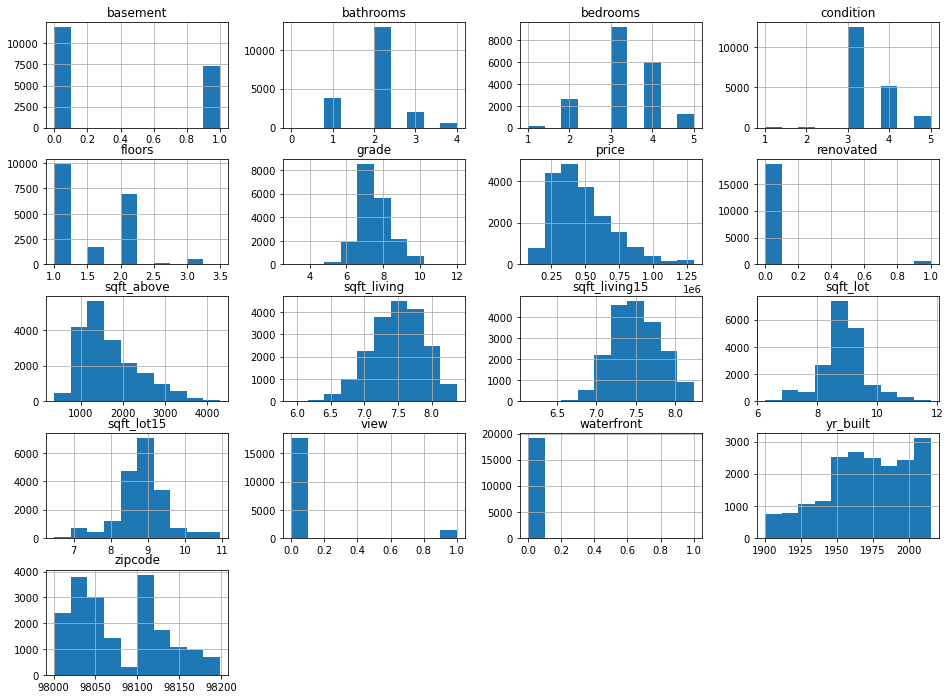

In [418]:
df.hist(figsize = (16,12));

In [419]:
# Standardization (z-score normalization)
# x' will have mean  𝜇=0  and  𝜎=1 
# Note that standardization does not make data  𝑚𝑜𝑟𝑒  normal, it will just change the mean and the standard error!

for var in continuous_feats:
    df[var] = (df[var] - df[var].mean()) / df[var].std()

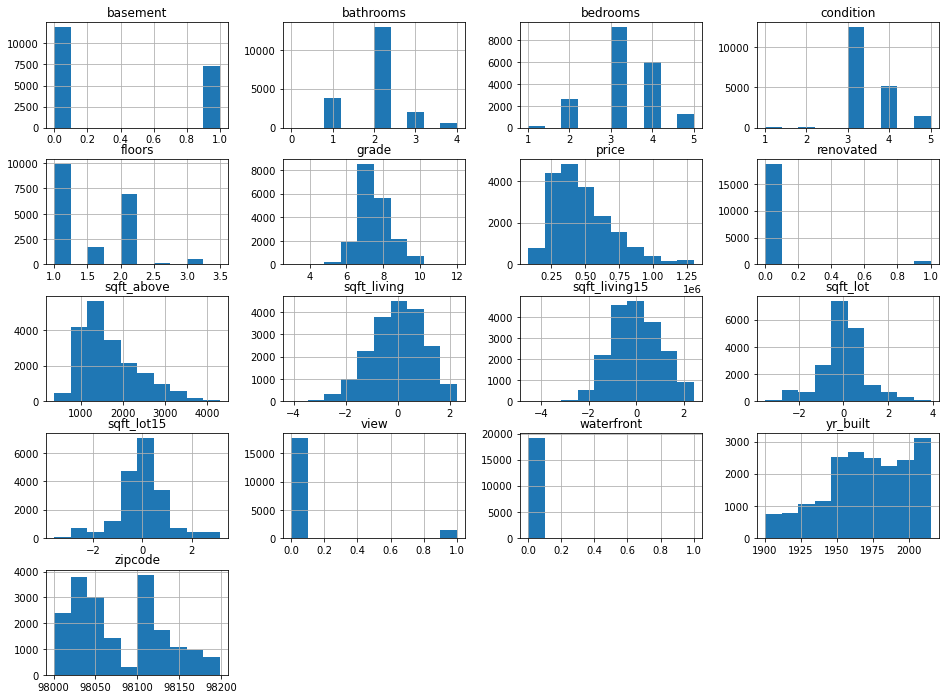

In [420]:
df.hist(figsize = (16, 12));

# Save Results

In [421]:
df.to_csv("df_cleaned.csv", index=False)

## One-hot encode Categorical Features

In [425]:
categorical_feats = ['basement', 'bathrooms', 'bedrooms', 'condition', 'floors', 'grade', 'renovated', 'view', 'waterfront', 'yr_built', 'zipcode']

df = df[categorical_feats]
df = pd.get_dummies(df, drop_first=True)

Note: This is a lot of columns.

In [426]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19228 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   basement    19228 non-null  int64  
 1   bathrooms   19228 non-null  int64  
 2   bedrooms    19228 non-null  int64  
 3   condition   19228 non-null  int64  
 4   floors      19228 non-null  float64
 5   grade       19228 non-null  int64  
 6   renovated   19228 non-null  int64  
 7   view        19228 non-null  int64  
 8   waterfront  19228 non-null  float64
 9   yr_built    19228 non-null  int64  
 10  zipcode     19228 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 1.8 MB


# Explore Data

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19424 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19424 non-null  float64
 1   bedrooms       19424 non-null  int64  
 2   bathrooms      19424 non-null  int64  
 3   sqft_living    19424 non-null  int64  
 4   sqft_lot       19424 non-null  int64  
 5   floors         19424 non-null  float64
 6   waterfront     19424 non-null  float64
 7   view           19424 non-null  int64  
 8   condition      19424 non-null  int64  
 9   grade          19424 non-null  int64  
 10  sqft_above     19424 non-null  int64  
 11  yr_built       19424 non-null  int64  
 12  zipcode        19424 non-null  int64  
 13  sqft_living15  19424 non-null  int64  
 14  sqft_lot15     19424 non-null  int64  
 15  renovated      19424 non-null  int64  
 16  basement       19424 non-null  int64  
dtypes: float64(3), int64(14)
memory usage: 2.7 MB


## 3.3 Check for linearity for continous features

/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warning

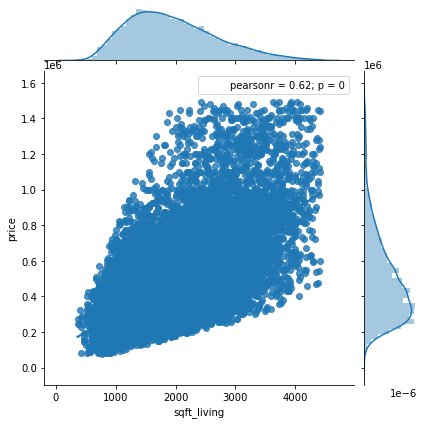

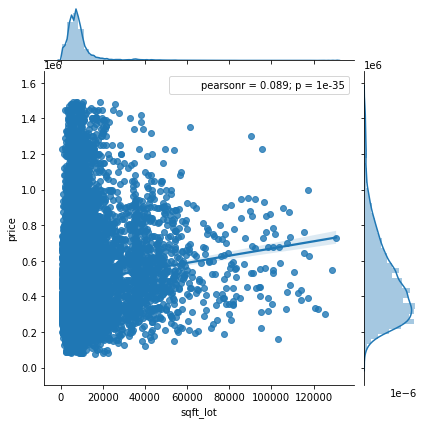

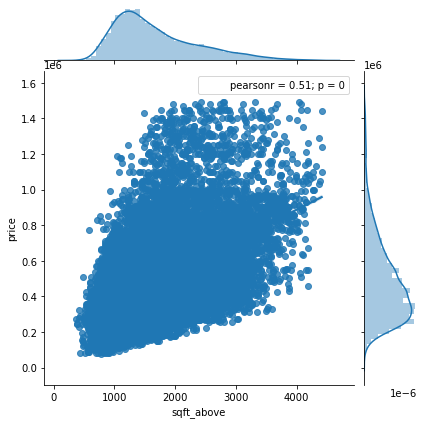

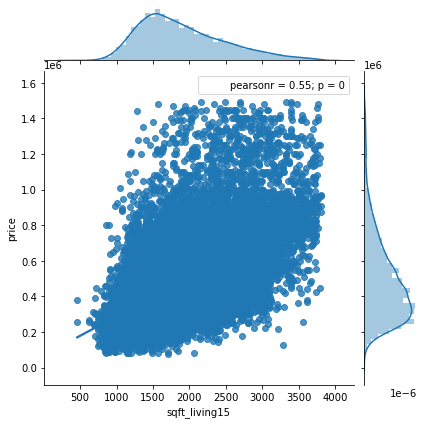

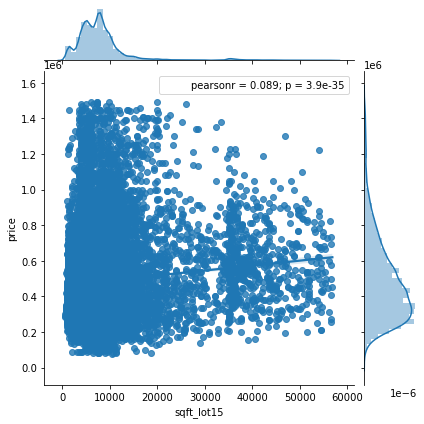

In [59]:
# Plot joint plots
continuous_feats = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']

for feat in continuous_feats:
    j = sns.jointplot(x = df[feat], y = df['price'], kind = 'reg')
    j.annotate(stats.pearsonr)

Note: sqft_living has the best linear relationship with price

# 3.4 Explore categorical features

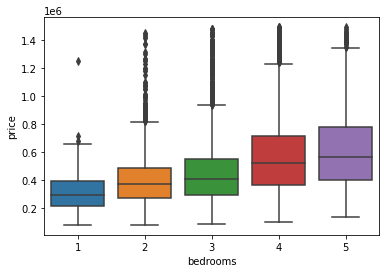

In [60]:
#categorical_feats = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'zipcode', 'renovated', 'basement']
sns.boxplot(x='bedrooms', y='price', data=df);

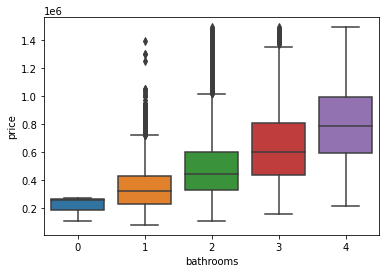

In [61]:
sns.boxplot(x='bathrooms', y='price', data=df);

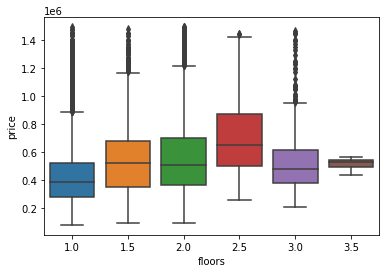

In [62]:
sns.boxplot(x='floors', y='price', data=df);

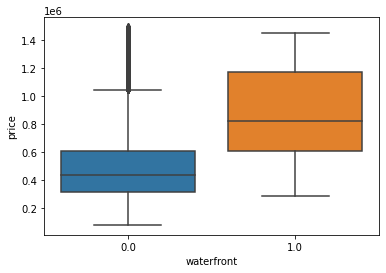

In [63]:
sns.boxplot(x='waterfront', y='price', data=df);

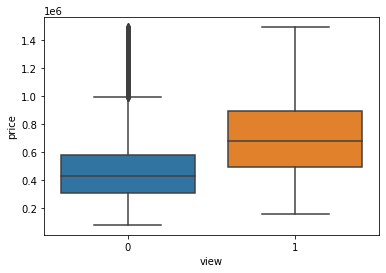

In [64]:
sns.boxplot(x='view', y='price', data=df);

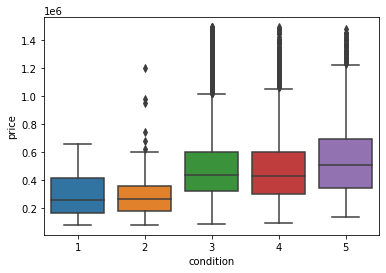

In [65]:
sns.boxplot(x='condition', y='price', data=df);

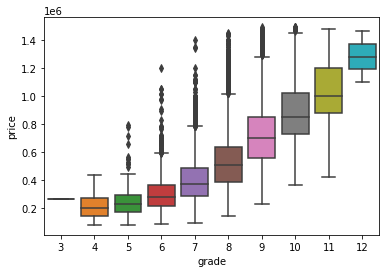

In [66]:
sns.boxplot(x='grade', y='price', data=df);

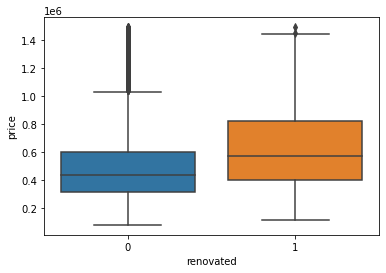

In [67]:
sns.boxplot(x='renovated', y='price', data=df);

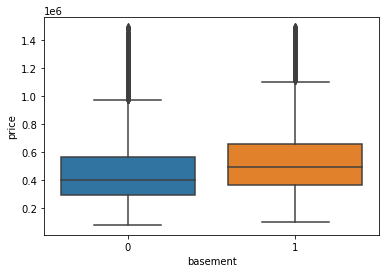

In [68]:
sns.boxplot(x='basement', y='price', data=df);

In [69]:
# Round bathrooms and floors
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,renovated,basement
0,221900.0,3,1,1180,5650,1.0,0.0,0,3,7,1180,1955,98178,1340,5650,0,0
1,538000.0,3,2,2570,7242,2.0,0.0,0,3,7,2170,1951,98125,1690,7639,1,1
2,180000.0,2,1,770,10000,1.0,0.0,0,3,6,770,1933,98028,2720,8062,0,0
3,604000.0,4,3,1960,5000,1.0,0.0,0,5,7,1050,1965,98136,1360,5000,0,1
4,510000.0,3,2,1680,8080,1.0,0.0,0,3,8,1680,1987,98074,1800,7503,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2,1530,1131,3.0,0.0,0,3,8,1530,2009,98103,1530,1509,0,0
21593,400000.0,4,2,2310,5813,2.0,0.0,0,3,8,2310,2014,98146,1830,7200,0,0
21594,402101.0,2,1,1020,1350,2.0,0.0,0,3,7,1020,2009,98144,1020,2007,0,0
21595,400000.0,3,2,1600,2388,2.0,0.0,0,3,8,1600,2004,98027,1410,1287,0,0


## 3.4 Check for multicollinearity

In [70]:
corr = df.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,renovated,basement
price,1.000000,0.297505,0.425715,0.621383,0.089340,0.260045,0.086304,0.285139,0.056177,0.631759,0.508692,0.025218,-0.001465,0.549341,0.088577,0.106018,0.189113
bedrooms,0.297505,1.000000,0.459150,0.611382,0.110473,0.166825,-0.032537,0.042546,0.027964,0.354391,0.493424,0.190374,-0.171287,0.411912,0.127974,-0.002030,0.141522
bathrooms,0.425715,0.459150,1.000000,0.627258,0.055126,0.357066,0.002984,0.123083,-0.058043,0.520399,0.503537,0.396067,-0.132080,0.429003,0.054509,0.050837,0.222857
sqft_living,0.621383,0.611382,0.627258,1.000000,0.222977,0.341628,0.009824,0.183481,-0.056778,0.709188,0.843694,0.341196,-0.192422,0.737684,0.239960,0.033759,0.193080
sqft_lot,0.089340,0.110473,0.055126,0.222977,1.000000,-0.113621,0.048894,0.050877,0.039230,0.131664,0.210249,0.024384,-0.180471,0.263950,0.811019,0.015304,-0.029964
floors,0.260045,0.166825,0.357066,0.341628,-0.113621,1.000000,-0.001931,-0.018843,-0.272400,0.458396,0.535924,0.507326,-0.059513,0.259807,-0.123293,-0.003840,-0.276321
waterfront,0.086304,-0.032537,0.002984,0.009824,0.048894,-0.001931,1.000000,0.188167,0.006636,0.001441,-0.003907,-0.034522,0.048489,0.026712,0.066572,0.080850,0.017872
view,0.285139,0.042546,0.123083,0.183481,0.050877,-0.018843,0.188167,1.000000,0.043332,0.153301,0.062872,-0.085762,0.122194,0.210347,0.042201,0.069965,0.176576
condition,0.056177,0.027964,-0.058043,-0.056778,0.039230,-0.272400,0.006636,0.043332,1.000000,-0.158467,-0.169304,-0.357417,-0.006542,-0.098669,0.056464,-0.057017,0.131157
grade,0.631759,0.354391,0.520399,0.709188,0.131664,0.458396,0.001441,0.153301,-0.158467,1.000000,0.703902,0.470885,-0.170088,0.662714,0.159536,0.001870,0.025888


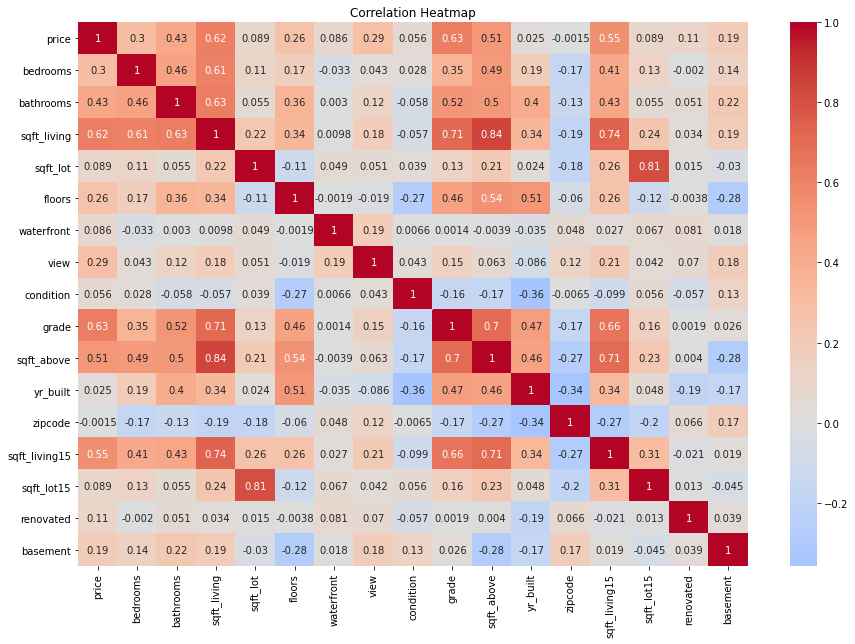

In [71]:
# Plot heatmap
plt.figure(figsize = (15,10))
sns.heatmap(corr, center = 0, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [72]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,renovated,basement
price,1.000000,0.297505,0.425715,0.621383,0.089340,0.260045,0.086304,0.285139,0.056177,0.631759,0.508692,0.025218,-0.001465,0.549341,0.088577,0.106018,0.189113
bedrooms,0.297505,1.000000,0.459150,0.611382,0.110473,0.166825,-0.032537,0.042546,0.027964,0.354391,0.493424,0.190374,-0.171287,0.411912,0.127974,-0.002030,0.141522
bathrooms,0.425715,0.459150,1.000000,0.627258,0.055126,0.357066,0.002984,0.123083,-0.058043,0.520399,0.503537,0.396067,-0.132080,0.429003,0.054509,0.050837,0.222857
sqft_living,0.621383,0.611382,0.627258,1.000000,0.222977,0.341628,0.009824,0.183481,-0.056778,0.709188,0.843694,0.341196,-0.192422,0.737684,0.239960,0.033759,0.193080
sqft_lot,0.089340,0.110473,0.055126,0.222977,1.000000,-0.113621,0.048894,0.050877,0.039230,0.131664,0.210249,0.024384,-0.180471,0.263950,0.811019,0.015304,-0.029964
floors,0.260045,0.166825,0.357066,0.341628,-0.113621,1.000000,-0.001931,-0.018843,-0.272400,0.458396,0.535924,0.507326,-0.059513,0.259807,-0.123293,-0.003840,-0.276321
waterfront,0.086304,-0.032537,0.002984,0.009824,0.048894,-0.001931,1.000000,0.188167,0.006636,0.001441,-0.003907,-0.034522,0.048489,0.026712,0.066572,0.080850,0.017872
view,0.285139,0.042546,0.123083,0.183481,0.050877,-0.018843,0.188167,1.000000,0.043332,0.153301,0.062872,-0.085762,0.122194,0.210347,0.042201,0.069965,0.176576
condition,0.056177,0.027964,-0.058043,-0.056778,0.039230,-0.272400,0.006636,0.043332,1.000000,-0.158467,-0.169304,-0.357417,-0.006542,-0.098669,0.056464,-0.057017,0.131157
grade,0.631759,0.354391,0.520399,0.709188,0.131664,0.458396,0.001441,0.153301,-0.158467,1.000000,0.703902,0.470885,-0.170088,0.662714,0.159536,0.001870,0.025888


In [73]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df_abs = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_abs['pairs'] = list(zip(df_abs.level_0, df_abs.level_1))

# set index to pairs
df_abs.set_index(['pairs'], inplace = True)

#d rop level columns
df_abs.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_abs.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df_abs.drop_duplicates(inplace=True)

In [74]:
abs(df.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,renovated,basement
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [75]:
df_abs[(df_abs.cc>.75) & (df_abs.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.843694
"(sqft_lot, sqft_lot15)",0.811019


In [76]:
df.drop(columns=['sqft_living', 'sqft_living15', 'sqft_lot15'], inplace=True) 

In [77]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'yr_built', 'zipcode',
       'renovated', 'basement'],
      dtype='object')

In [78]:
Convert categorical_feats to str
for var in categorical_feats:
    df[var] = df[var].astype('str')   

SyntaxError: invalid syntax (<ipython-input-78-1b2f4c5b3acb>, line 1)

In [ ]:
df.info()